In [13]:
import pandas as pd

# Load data (example with CSVs, might need openpyxl for Excel)
production = pd.read_csv(r"C:\Users\saiba\Downloads\ProductionMetric.csv")
device = pd.read_csv(r"C:\Users\saiba\Downloads\DeviceProperty.csv")
quality = pd.read_csv(r"C:\Users\saiba\Downloads\Quality.csv")

# Show first few rows of each
production.head()


,prodmetric_stream_key,deviceKey,start_time,end_time,good_count,reject_count,ideal_time,run_time,unplanned_stop_time,planned_stop_time,unplanned_stop_time.1,performance_impact_display_name,process_state_display_name,process_state_reason_display_name,job_display_name,part_display_name,shift_display_name,team_display_name
0,5552062,Line3,2025-01-29 19:10:14.3284760 -06:00,2025-01-29 19:13:19.6285480 -06:00,0,0,0.000000,0.000000,185.300072,0.0,185.300072,Unplanned Stop,Down,Security Alarm,Part D-4000,Part D,Second Shift,Team 2
1,5552060,Line3,2025-01-29 19:05:37.3369440 -06:00,2025-01-29 19:10:14.3284760 -06:00,96,0,157.363822,276.991532,0.000000,0.0,0.000000,Run,Running,Running Normally,Part D-4000,Part D,Second Shift,Team 2
2,5552046,Line4,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:02:07.0000000 -06:00,54,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part J-4000,Part J,Second Shift,Team 3
3,5552048,Line2,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:01:34.0000000 -06:00,0,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part M-3000,Part M,Second Shift,Team 3
4,5552049,Line1,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:01:52.0000000 -06:00,67,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part P-2000,Part P,Second Shift,Team 2


In [14]:
#we will go with first Data set production
print(production.shape)
print(production.columns)
production.head()


(10000, 18)
Index(['prodmetric_stream_key', 'deviceKey', 'start_time', 'end_time',
       'good_count', 'reject_count', 'ideal_time', 'run_time',
       'unplanned_stop_time', 'planned_stop_time', 'unplanned_stop_time.1',
       'performance_impact_display_name', 'process_state_display_name',
       'process_state_reason_display_name', 'job_display_name',
       'part_display_name', 'shift_display_name', 'team_display_name'],
      dtype='object')


,prodmetric_stream_key,deviceKey,start_time,end_time,good_count,reject_count,ideal_time,run_time,unplanned_stop_time,planned_stop_time,unplanned_stop_time.1,performance_impact_display_name,process_state_display_name,process_state_reason_display_name,job_display_name,part_display_name,shift_display_name,team_display_name
0,5552062,Line3,2025-01-29 19:10:14.3284760 -06:00,2025-01-29 19:13:19.6285480 -06:00,0,0,0.000000,0.000000,185.300072,0.0,185.300072,Unplanned Stop,Down,Security Alarm,Part D-4000,Part D,Second Shift,Team 2
1,5552060,Line3,2025-01-29 19:05:37.3369440 -06:00,2025-01-29 19:10:14.3284760 -06:00,96,0,157.363822,276.991532,0.000000,0.0,0.000000,Run,Running,Running Normally,Part D-4000,Part D,Second Shift,Team 2
2,5552046,Line4,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:02:07.0000000 -06:00,54,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part J-4000,Part J,Second Shift,Team 3
3,5552048,Line2,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:01:34.0000000 -06:00,0,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part M-3000,Part M,Second Shift,Team 3
4,5552049,Line1,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:01:52.0000000 -06:00,67,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part P-2000,Part P,Second Shift,Team 2


In [ ]:
# Drop the duplicate column
production = production.drop(columns=["unplanned_stop_time.1"])

# Convert time columns to datetime
production["start_time"] = pd.to_datetime(production["start_time"])
production["end_time"] = pd.to_datetime(production["end_time"])

# Check for missing/null values
missing_values = production.isnull().sum()

missing_values


C:\Users\saiba\AppData\Local\Temp\ipykernel_18908\3166812409.py:6: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  production["end_time"] = pd.to_datetime(production["end_time"])


prodmetric_stream_key                0
deviceKey                            0
start_time                           0
end_time                             0
good_count                           0
reject_count                         0
ideal_time                           0
run_time                             0
unplanned_stop_time                  0
planned_stop_time                    0
performance_impact_display_name      0
process_state_display_name           0
process_state_reason_display_name    0
job_display_name                     0
part_display_name                    0
shift_display_name                   0
team_display_name                    0
dtype: int64

In [16]:
# Step 1: Calculate total downtime values
total_unplanned = production["unplanned_stop_time"].sum()
total_planned = production["planned_stop_time"].sum()
total_downtime = total_unplanned + total_planned

# Step 2: Calculate percentages
unplanned_pct = (total_unplanned / total_downtime) * 100
planned_pct = (total_planned / total_downtime) * 100

# Step 3: Print the results
print("Total Unplanned Downtime:", round(total_unplanned, 2), "seconds")
print("Total Planned Downtime:", round(total_planned, 2), "seconds")
print("Unplanned Downtime %:", round(unplanned_pct, 2))
print("Planned Downtime %:", round(planned_pct, 2))



Total Unplanned Downtime: 472968.35 seconds
Total Planned Downtime: 149475.12 seconds
Unplanned Downtime %: 75.99
Planned Downtime %: 24.01


In [17]:
# Group by deviceKey and calculate stats for downtime
device_downtime = production.groupby("deviceKey")[["unplanned_stop_time", "planned_stop_time"]].agg(
    mean_unplanned=("unplanned_stop_time", "mean"),
    median_unplanned=("unplanned_stop_time", "median"),
    std_unplanned=("unplanned_stop_time", "std"),
    max_unplanned=("unplanned_stop_time", "max"),
    min_unplanned=("unplanned_stop_time", "min"),
    mean_planned=("planned_stop_time", "mean"),
    median_planned=("planned_stop_time", "median"),
    std_planned=("planned_stop_time", "std"),
    max_planned=("planned_stop_time", "max"),
    min_planned=("planned_stop_time", "min")
).round(2)

# Show the result
print(device_downtime)


           mean_unplanned  median_unplanned  std_unplanned  max_unplanned  \
deviceKey                                                                   
Line1               51.58               0.0          89.93         640.21   
Line2               49.17               0.0          84.25         809.16   
Line3               41.30               0.0          78.06         439.73   
Line4               49.01               0.0          81.68         468.44   

           min_unplanned  mean_planned  median_planned  std_planned  \
deviceKey                                                             
Line1                0.0         16.73             0.0        79.99   
Line2                0.0         15.08             0.0        74.10   
Line3                0.0         13.84             0.0        67.71   
Line4                0.0         14.39             0.0        70.59   

           max_planned  min_planned  
deviceKey                            
Line1            951.0          0.

Matplotlib is building the font cache; this may take a moment.
C:\Users\saiba\AppData\Local\Temp\ipykernel_18908\811868355.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reason_counts.head(10), x="count", y="reason", palette="magma")


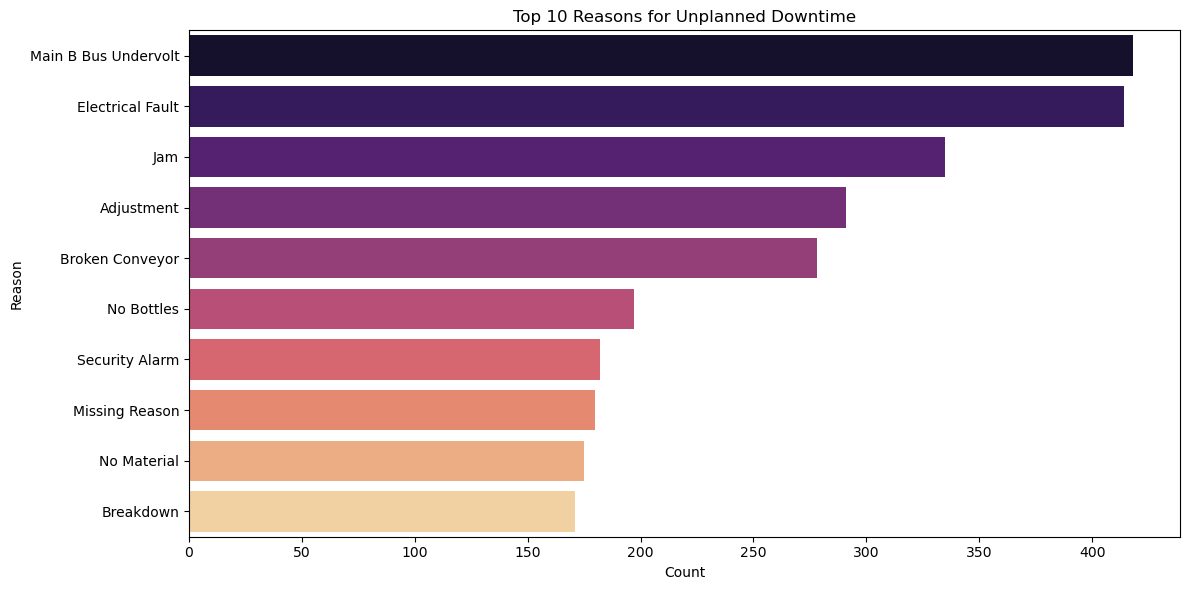

In [18]:
# Step 1: Filter only unplanned stops
unplanned_stops = production[production["unplanned_stop_time"] > 0]

# Step 2: Count how often each reason appears
reason_counts = unplanned_stops["process_state_reason_display_name"].value_counts().reset_index()
reason_counts.columns = ["reason", "count"]

# Step 3: Plot top 10 reasons
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=reason_counts.head(10), x="count", y="reason", palette="magma")
plt.title("Top 10 Reasons for Unplanned Downtime")
plt.xlabel("Count")
plt.ylabel("Reason")
plt.tight_layout()
plt.show()


C:\Users\saiba\AppData\Local\Temp\ipykernel_18908\2854431924.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=production, x="deviceKey", y="unplanned_stop_time", palette="Set2")


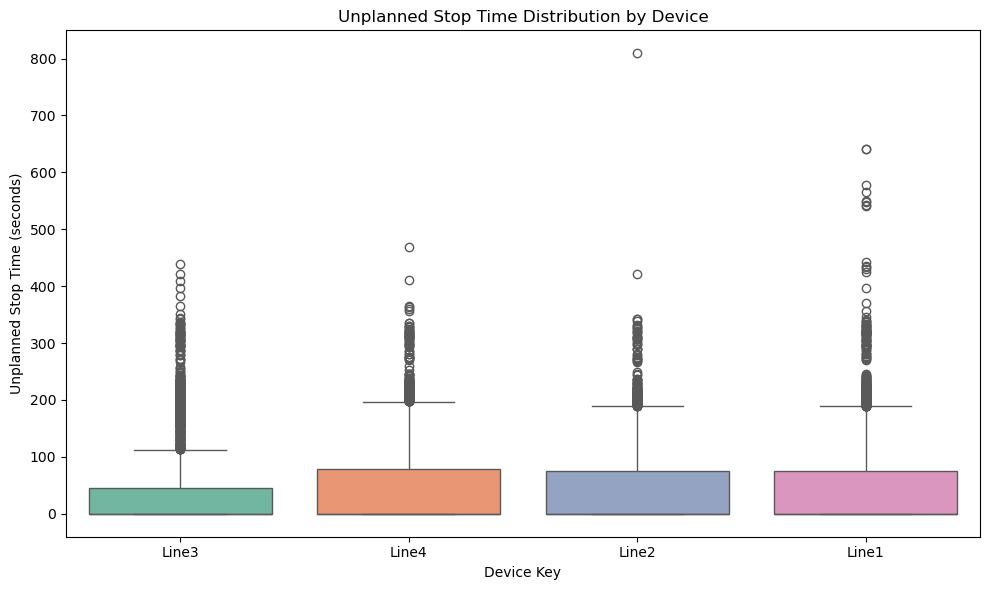

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=production, x="deviceKey", y="unplanned_stop_time", palette="Set2")
plt.title("Unplanned Stop Time Distribution by Device")
plt.ylabel("Unplanned Stop Time (seconds)")
plt.xlabel("Device Key")
plt.tight_layout()
plt.show()


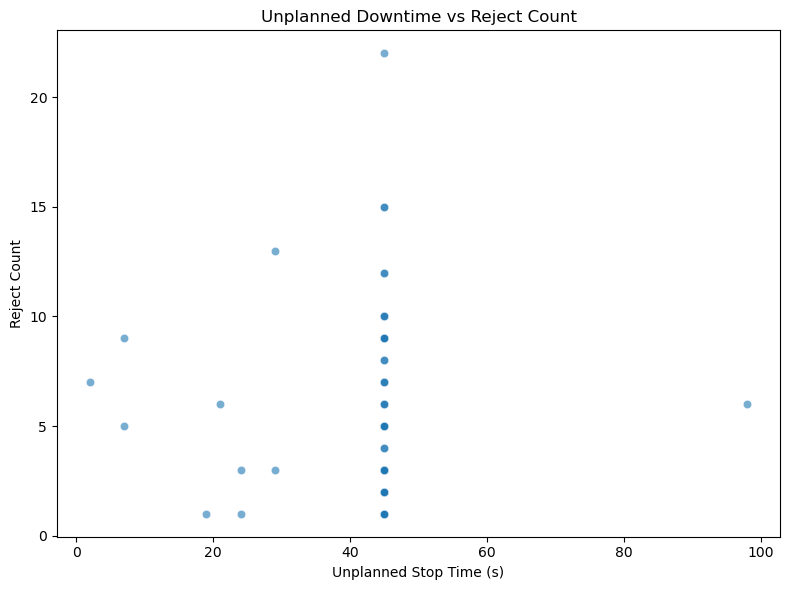

Correlation coefficient: 0.014


In [20]:
# Filter only rows where both values are positive
filtered = production[(production["unplanned_stop_time"] > 0) & (production["reject_count"] > 0)]

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered, x="unplanned_stop_time", y="reject_count", alpha=0.6)
plt.title("Unplanned Downtime vs Reject Count")
plt.xlabel("Unplanned Stop Time (s)")
plt.ylabel("Reject Count")
plt.tight_layout()
plt.show()

# Optional: calculate correlation
correlation = filtered["unplanned_stop_time"].corr(filtered["reject_count"])
print("Correlation coefficient:", round(correlation, 3))


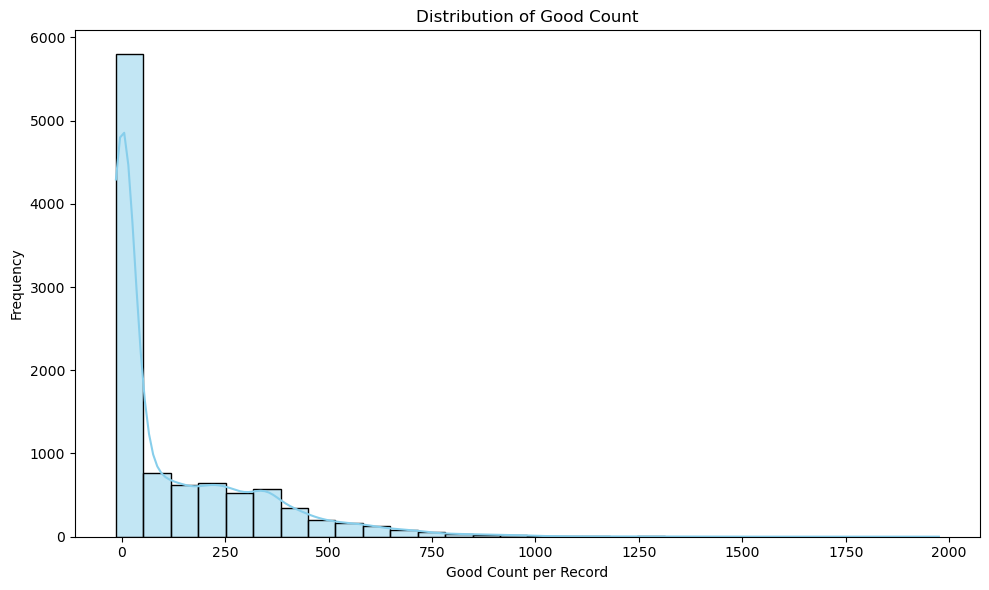

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(production["good_count"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Good Count")
plt.xlabel("Good Count per Record")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


C:\Users\saiba\AppData\Local\Temp\ipykernel_18908\4272058620.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  production["good_per_hour"].replace([float("inf"), -float("inf")], 0, inplace=True)
C:\Users\saiba\AppData\Local\Temp\ipykernel_18908\4272058620.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

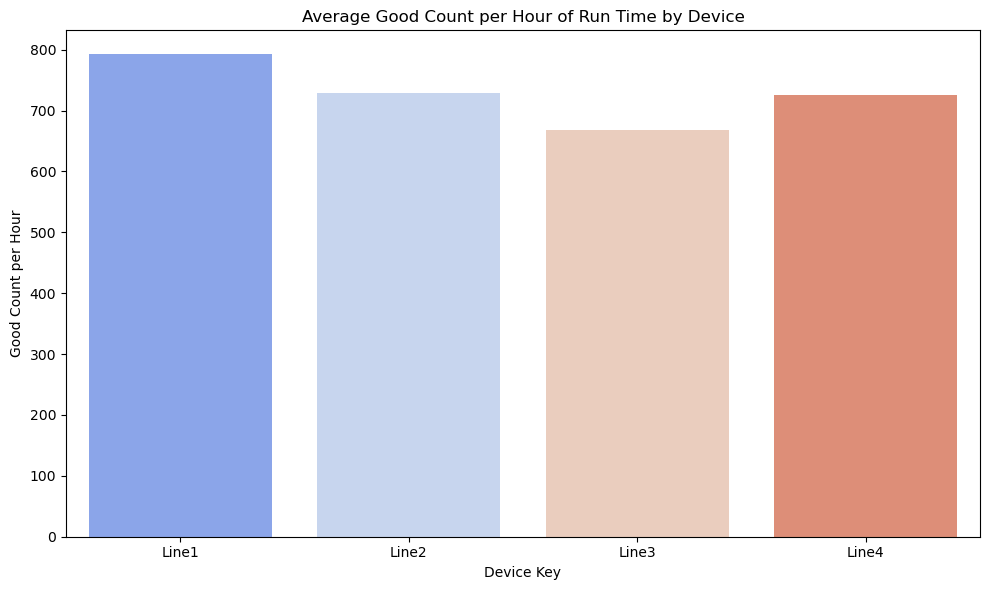

In [23]:
# Avoid division by zero
production["run_time_hours"] = production["run_time"] / 3600
production["good_per_hour"] = production["good_count"] / production["run_time_hours"]

# Replace inf and NaN (from zero run time)
production["good_per_hour"].replace([float("inf"), -float("inf")], 0, inplace=True)
production["good_per_hour"].fillna(0, inplace=True)

# Group by deviceKey
good_efficiency = production.groupby("deviceKey")["good_per_hour"].mean().round(2).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=good_efficiency, x="deviceKey", y="good_per_hour", palette="coolwarm")
plt.title("Average Good Count per Hour of Run Time by Device")
plt.xlabel("Device Key")
plt.ylabel("Good Count per Hour")
plt.tight_layout()
plt.show()


In [25]:
# analyzing quality data set

# Check for missing values
print("Missing values in Quality dataset:\n")
print(quality.isnull().sum())

# Optional: Remove clearly invalid reject reasons (e.g., 'xyz')
quality = quality[quality["reject_reason_display_name"].str.lower() != "xyz"]

# Reset index after cleaning
quality.reset_index(drop=True, inplace=True)

# Show cleaned dataset preview
print("\nCleaned Quality dataset preview:")
print(quality.head())



Missing values in Quality dataset:

quality_stream_key            0
deviceKey                     0
count                         0
reject_reason_display_name    0
prodmetric_stream_key         0
dtype: int64

Cleaned Quality dataset preview:
   quality_stream_key deviceKey  count reject_reason_display_name  \
0             1771948    Line 4      6        Detected by Max WIP   
1             1772152    Line 4     11                     Reject   
2             1772153    Line 4      9        Detected by Max WIP   
3             1772154    Line 4     11        Detected by Max WIP   
4             1772155    Line 4      9                     Reject   

   prodmetric_stream_key  
0                5468380  
1                5468383  
2                5468383  
3                5468386  
4                5468386  


C:\Users\saiba\AppData\Local\Temp\ipykernel_18908\663135175.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_reject_reasons.head(10), x="count", y="reason", palette="rocket")


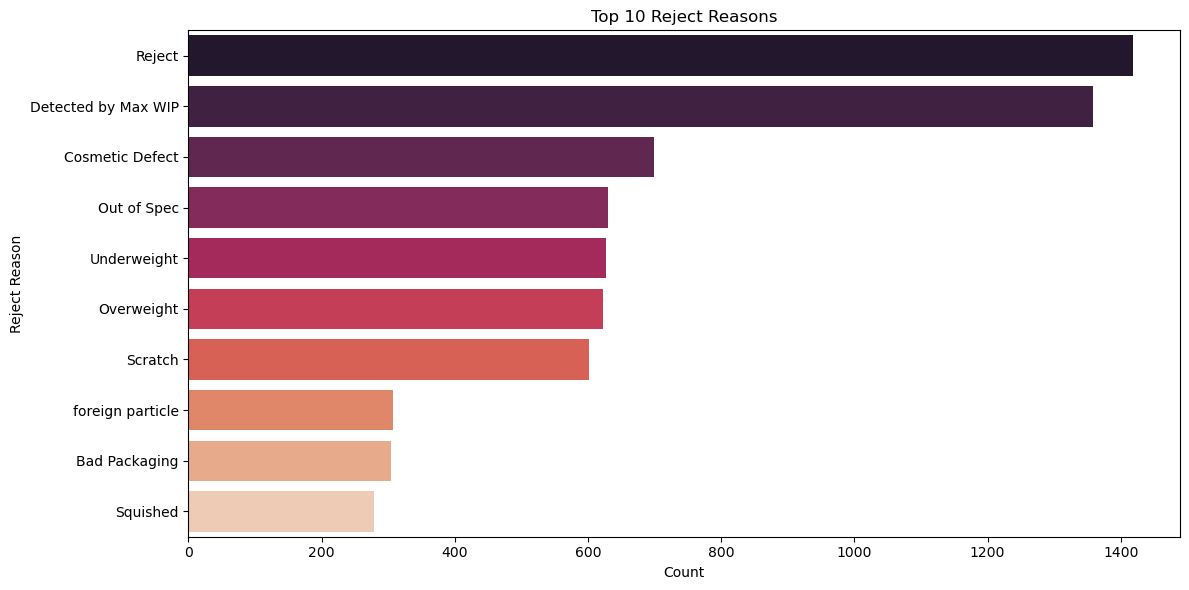

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count top reject reasons
top_reject_reasons = quality["reject_reason_display_name"].value_counts().reset_index()
top_reject_reasons.columns = ["reason", "count"]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_reject_reasons.head(10), x="count", y="reason", palette="rocket")
plt.title("Top 10 Reject Reasons")
plt.xlabel("Count")
plt.ylabel("Reject Reason")
plt.tight_layout()
plt.show()


In [27]:
# Merge Quality and ProductionMetric on prodmetric_stream_key
merged_data = pd.merge(quality, production, on="prodmetric_stream_key", how="left")

# Show preview of merged data
print("Merged Data Preview:")
print(merged_data.head())


Merged Data Preview:
   quality_stream_key deviceKey_x  count reject_reason_display_name  \
0             1771948      Line 4      6        Detected by Max WIP   
1             1772152      Line 4     11                     Reject   
2             1772153      Line 4      9        Detected by Max WIP   
3             1772154      Line 4     11        Detected by Max WIP   
4             1772155      Line 4      9                     Reject   

   prodmetric_stream_key deviceKey_y                          start_time  \
0                5468380       Line4  2025-01-20 11:25:18.4230500 -06:00   
1                5468383       Line4  2025-01-20 11:39:22.7197510 -06:00   
2                5468383       Line4  2025-01-20 11:39:22.7197510 -06:00   
3                5468386       Line4  2025-01-20 12:03:49.6202580 -06:00   
4                5468386       Line4  2025-01-20 12:03:49.6202580 -06:00   

                             end_time  good_count  reject_count  ...  \
0  2025-01-20 11:35:17.

In [29]:

# Total rejects from Quality dataset
total_rejects = merged_data["count"].sum()

# Total good + reject counts from Production dataset (joined rows)
total_good = merged_data["good_count"].sum()

# Overall reject rate
reject_rate = total_rejects / (total_rejects + total_good)
print("Overall Reject Rate:", round(reject_rate * 100, 2), "%")



Overall Reject Rate: 1.81 %


C:\Users\saiba\AppData\Local\Temp\ipykernel_18908\3969334517.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reject_summary, x="deviceKey_y", y="reject_rate_percent", palette="viridis")


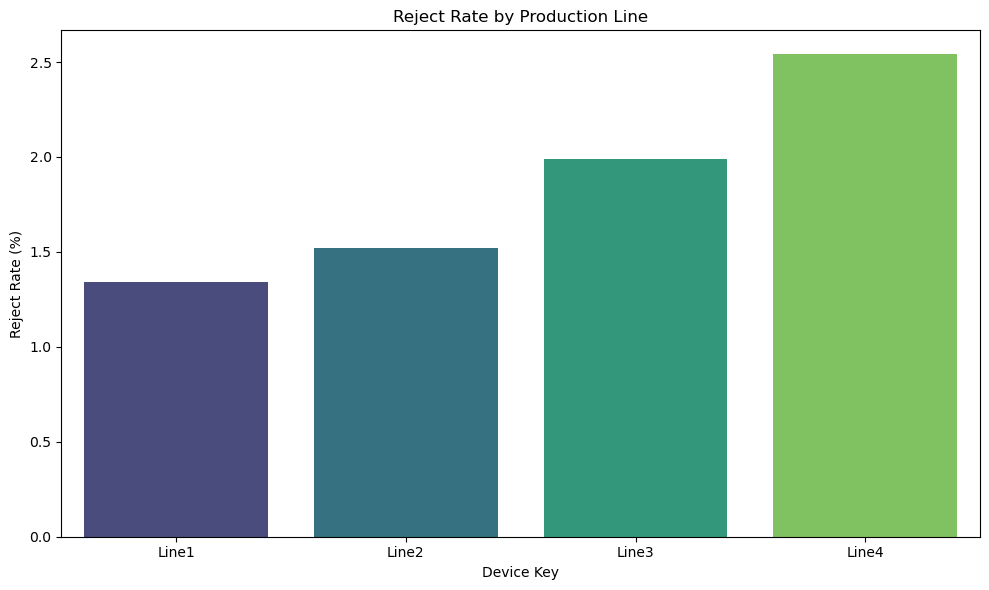

In [30]:
# Group by deviceKey and sum reject + good counts
reject_summary = merged_data.groupby("deviceKey_y").agg({
    "count": "sum",
    "good_count": "sum"
}).reset_index()

# Calculate reject rate per device
reject_summary["reject_rate"] = reject_summary["count"] / (reject_summary["count"] + reject_summary["good_count"])
reject_summary["reject_rate_percent"] = (reject_summary["reject_rate"] * 100).round(2)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=reject_summary, x="deviceKey_y", y="reject_rate_percent", palette="viridis")
plt.title("Reject Rate by Production Line")
plt.xlabel("Device Key")
plt.ylabel("Reject Rate (%)")
plt.tight_layout()
plt.show()


C:\Users\saiba\AppData\Local\Temp\ipykernel_18908\1318426191.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reject_by_shift, x="shift_display_name", y="reject_rate_percent", palette="crest")


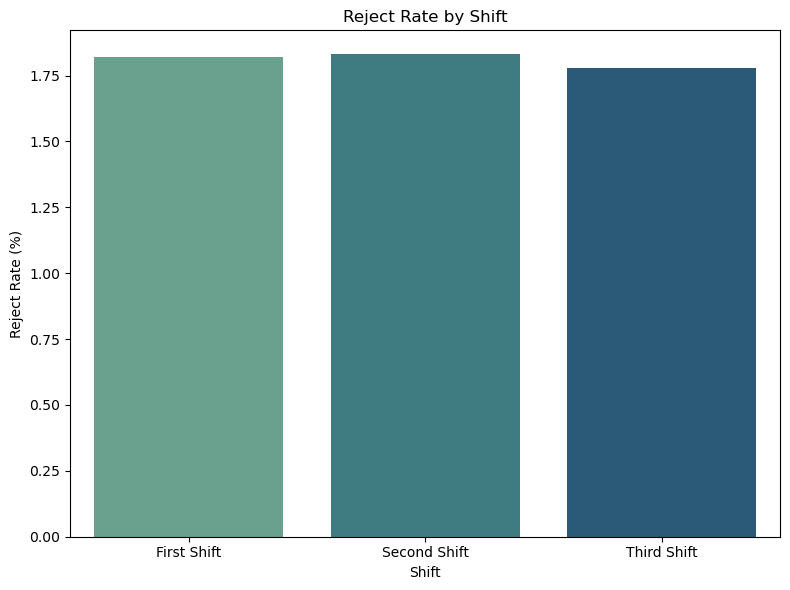

In [31]:
# Reject rate by shift
reject_by_shift = merged_data.groupby("shift_display_name").agg({
    "count": "sum",        # rejected units
    "good_count": "sum"    # good units
}).reset_index()

# Calculate reject rate
reject_by_shift["reject_rate"] = reject_by_shift["count"] / (reject_by_shift["count"] + reject_by_shift["good_count"])
reject_by_shift["reject_rate_percent"] = (reject_by_shift["reject_rate"] * 100).round(2)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=reject_by_shift, x="shift_display_name", y="reject_rate_percent", palette="crest")
plt.title("Reject Rate by Shift")
plt.xlabel("Shift")
plt.ylabel("Reject Rate (%)")
plt.tight_layout()
plt.show()


Reject Rate by Team:
  team_display_name  reject_rate_percent
0           No Team                15.79
1            Team 1                 1.79
2            Team 2                 1.82
3            Team 3                 1.82


C:\Users\saiba\AppData\Local\Temp\ipykernel_18908\613163365.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reject_by_team, x="team_display_name", y="reject_rate_percent", palette="flare")


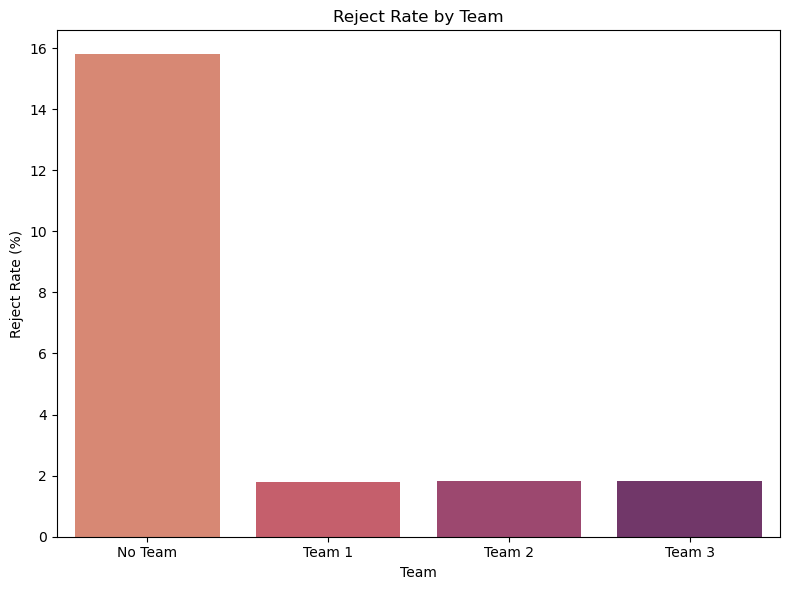

In [32]:
# Group data by team_display_name
reject_by_team = merged_data.groupby("team_display_name").agg({
    "count": "sum",        # total rejected units
    "good_count": "sum"    # total good units
}).reset_index()

# Calculate reject rate
reject_by_team["reject_rate"] = reject_by_team["count"] / (reject_by_team["count"] + reject_by_team["good_count"])
reject_by_team["reject_rate_percent"] = (reject_by_team["reject_rate"] * 100).round(2)

# Print results
print("Reject Rate by Team:")
print(reject_by_team[["team_display_name", "reject_rate_percent"]])

# Plot the comparison
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(data=reject_by_team, x="team_display_name", y="reject_rate_percent", palette="flare")
plt.title("Reject Rate by Team")
plt.xlabel("Team")
plt.ylabel("Reject Rate (%)")
plt.tight_layout()
plt.show()


In [35]:
# third data set
# Load the DeviceProperty dataset
device = pd.read_csv(r"C:\Users\saiba\Downloads\DeviceProperty.csv")  # use full path if needed

# Step 2: Check for missing values
print("Missing values:\n", device.isnull().sum())

# Step 3: Preview the dataset
print("\nPreview:\n", device.head())

# Step 4: Check unique deviceKeys
print("\nUnique deviceKey values:\n", device["deviceKey"].unique())



Missing values:
 deviceKey           0
Area                0
DefaultCycleTime    0
Enterprise          0
Line                0
Location            0
Operation           0
Plant               0
SubType             0
Type                0
dtype: int64

Preview:
   deviceKey             Area  DefaultCycleTime Enterprise            Line  \
0     Line1       Assembly-2                50   ManuCorp    AssemblyMain   
1     Line2          Fab-Pro                75   ManuCorp  WeldingPrimary   
2     Line3       Paint-Auto               100   ManuCorp    PaintingMain   
3     Line4  Smart-Logistics                20   ManuCorp    MaterialFlow   

       Location            Operation       Plant    SubType  \
0    Building G    Advanced Assembly  NorthPlant  HighSpeed   
1  Building C-2        Laser Welding  SouthPlant  Precision   
2  Building D-2  Electrostatic Paint   WestPlant     E-Coat   
3    Building J         AGV Transfer   WestPlant  Automated   

                 Type  
0  Production

In [36]:
# Step 5: Merge DeviceProperty with full production-quality data
final_merged_data = pd.merge(merged_data, device, left_on="deviceKey_y", right_on="deviceKey", how="left")

# Preview final merged data
final_merged_data.head()


,quality_stream_key,deviceKey_x,count,reject_reason_display_name,prodmetric_stream_key,deviceKey_y,start_time,end_time,good_count,reject_count,...,deviceKey,Area,DefaultCycleTime,Enterprise,Line,Location,Operation,Plant,SubType,Type
0,1771948,Line 4,6,Detected by Max WIP,5468380,Line4,2025-01-20 11:25:18.4230500 -06:00,2025-01-20 11:35:17.0000000 -06:00,372,6,...,Line4,Smart-Logistics,20,ManuCorp,MaterialFlow,Building J,AGV Transfer,WestPlant,Automated,Smart-Logistics
1,1772152,Line 4,11,Reject,5468383,Line4,2025-01-20 11:39:22.7197510 -06:00,2025-01-20 12:00:00.0000000 -06:00,738,20,...,Line4,Smart-Logistics,20,ManuCorp,MaterialFlow,Building J,AGV Transfer,WestPlant,Automated,Smart-Logistics
2,1772153,Line 4,9,Detected by Max WIP,5468383,Line4,2025-01-20 11:39:22.7197510 -06:00,2025-01-20 12:00:00.0000000 -06:00,738,20,...,Line4,Smart-Logistics,20,ManuCorp,MaterialFlow,Building J,AGV Transfer,WestPlant,Automated,Smart-Logistics
3,1772154,Line 4,11,Detected by Max WIP,5468386,Line4,2025-01-20 12:03:49.6202580 -06:00,2025-01-20 12:26:21.3499470 -06:00,806,20,...,Line4,Smart-Logistics,20,ManuCorp,MaterialFlow,Building J,AGV Transfer,WestPlant,Automated,Smart-Logistics
4,1772155,Line 4,9,Reject,5468386,Line4,2025-01-20 12:03:49.6202580 -06:00,2025-01-20 12:26:21.3499470 -06:00,806,20,...,Line4,Smart-Logistics,20,ManuCorp,MaterialFlow,Building J,AGV Transfer,WestPlant,Automated,Smart-Logistics


In [37]:
# Step 6: Group and summarize by deviceKey
device_summary = final_merged_data.groupby("deviceKey").agg({
    "count": "sum",               # total rejects
    "good_count": "sum",          # total good units
    "DefaultCycleTime": "first",  # assume consistent per device
    "Type": "first",
    "SubType": "first",
    "Plant": "first"
}).reset_index()

# Step 7: Calculate reject rate and efficiency
device_summary["reject_rate"] = device_summary["count"] / (device_summary["count"] + device_summary["good_count"])
device_summary["good_per_hour"] = device_summary["good_count"] / (device_summary["DefaultCycleTime"] * (device_summary["count"] + device_summary["good_count"]) / 3600)
device_summary["reject_rate_percent"] = (device_summary["reject_rate"] * 100).round(2)

# Display summary
print("\nDevice-Level Performance Summary:")
print(device_summary[["deviceKey", "reject_rate_percent", "good_per_hour", "Type", "Plant"]])



Device-Level Performance Summary:
  deviceKey  reject_rate_percent  good_per_hour                Type  \
0     Line1                 1.34      71.033464  Production-Premium   
1     Line2                 1.52      47.268447    Production-Laser   
2     Line3                 1.99      35.284690   Production-Finish   
3     Line4                 2.54     175.430294     Smart-Logistics   

        Plant  
0  NorthPlant  
1  SouthPlant  
2   WestPlant  
3   WestPlant  


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Bar Chart: Reject Rate by Device Type ---
type_summary = final_merged_data.groupby("Type").agg({
    "count": "sum",
    "good_count": "sum"
}).reset_index()








In [39]:
# Calculate reject rate
type_summary["reject_rate"] = type_summary["count"] / (type_summary["count"] + type_summary["good_count"])
type_summary["reject_rate_percent"] = (type_summary["reject_rate"] * 100).round(2)


C:\Users\saiba\AppData\Local\Temp\ipykernel_18908\2080571667.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=type_summary, x="Type", y="reject_rate_percent", palette="mako")


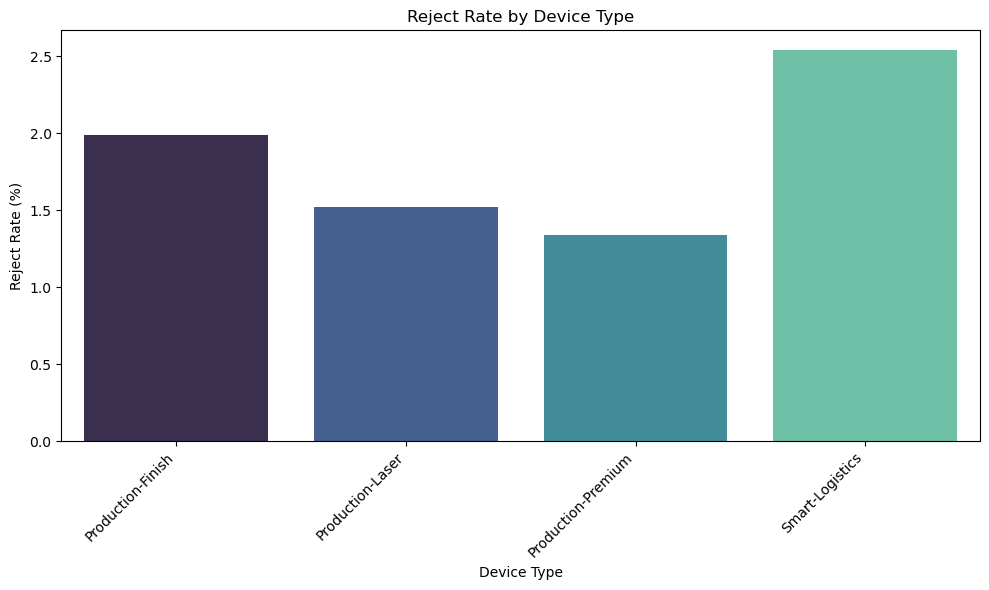

In [40]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=type_summary, x="Type", y="reject_rate_percent", palette="mako")
plt.title("Reject Rate by Device Type")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Device Type")
plt.ylabel("Reject Rate (%)")
plt.tight_layout()
plt.show()

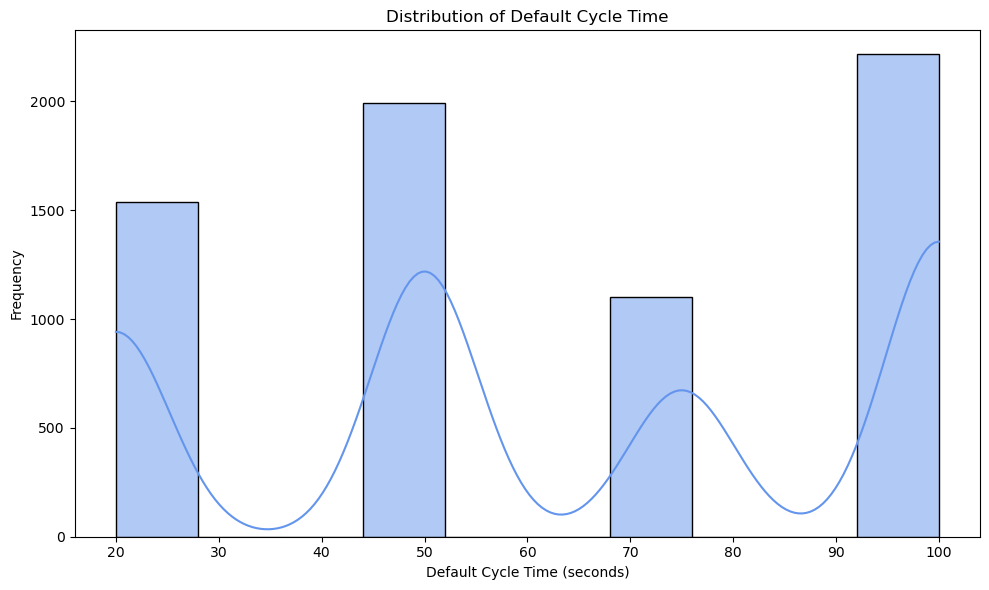

In [43]:
# --- Histogram: Distribution of Default Cycle Time ---
plt.figure(figsize=(10, 6))
sns.histplot(final_merged_data["DefaultCycleTime"], bins=10, kde=True, color="cornflowerblue")
plt.title("Distribution of Default Cycle Time")
plt.xlabel("Default Cycle Time (seconds)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()